# U.S. Medical Insurance Costs

### Description

In this project, a **CSV** file with medical insurance costs will be investigated using Python fundamentals. The goal with this project will be to analyze various attributes within **insurance.csv** to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

### Dataset Exploring

We need to import the pandas package so we can easily see what sort of data we are working with and load it into our code (plus also matplotlib and scipy for graphing and further analysis). 

Our analysis on the dataset, we will determine:

- The name of all the variables
- The type of the variables
- The number of people in dataset
- Any missing information

In [1]:
#%pip install matplotlib
#%pip install pandas
#%pip install scipy
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
insurance_data = pd.read_csv("insurance.csv")
insurance_data.info()

print(insurance_data.head())
print(type(insurance_data["sex"][0]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'str'>


We can see that we have 7 different variables and the types for them:
- Age: Integer
- Sex: String (Pandas stores it as a Python object)
- BMI: Float
- Children: Integer
- Smoker: String (Pandas stores it as a Python object)
- Region: String (Pandas stores it as a Python object)
- Charges: Float

There are 1338 entries in the dataset and no missing information

I'm going to want to know if a person is a parent or not so let's make it easy by making a new column. I'll also see the difference in counts between the two groups too.

In [53]:
insurance_data['parent'] = insurance_data['children'] > 0
insurance_data.groupby("parent").size()

parent
False    574
True     764
dtype: int64

Pretty even split between the two groups of parents vs non-parents

### Analysis

Now that we have the dataset available in Python, it's time to see what sort of information we can find.
Some ideas from the project directory include:
- Find out the average age of the patients in the dataset.
- Look at the different costs between smokers vs. non-smokers.
- - Analyze where a majority of the individuals are from.

We can use these as starting points and expand each point even further.

In [69]:
# Adjusting the look of boxplots for analysis 
boxprops = dict(linewidth=1.5)
medianprops = dict(linewidth = 3, color="red")
meanprops = dict(linestyle="dotted", color="green", linewidth=3)

median_line = plt.Line2D([], [], linestyle="solid", color="red", linewidth=2, label="Median")
mean_line = plt.Line2D([], [], linestyle="dotted", color="green", linewidth=2.5, label="Mean")

#### Average age of a person

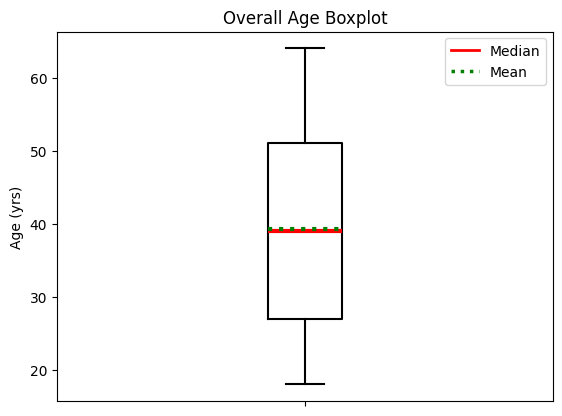

In [167]:
insurance_data.boxplot(column="age", grid=False,showmeans=True, meanline=True, boxprops=boxprops, whiskerprops=boxprops, medianprops=medianprops, meanprops=meanprops, capprops=boxprops)
plt.title("Overall Age Boxplot")

# Legend for the median/mean lines
plt.legend(handles=[median_line, mean_line])

# Removing unnessary x label + adding y label
plt.xticks([1],"")
plt.ylabel("Age (yrs)")
plt.show()

The whole dataset has a pretty uniform distribution of ages as seen in the boxplot above.

We can also determine the averages grouped by different varaibles such as:
- The average age separated by sex
- The average age separated by smoker status
- The average age by area
- The average age of people with children vs no children

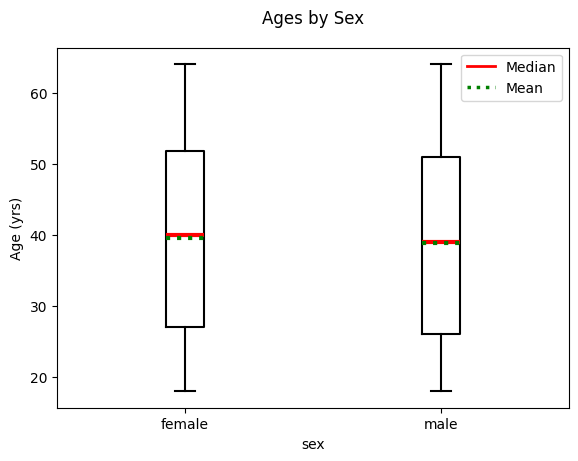

In [174]:
insurance_data.boxplot(column="age", by="sex", grid=False, showmeans=True, meanline=True, boxprops=boxprops, whiskerprops=boxprops, medianprops=medianprops, meanprops=meanprops, capprops=boxprops)
plt.suptitle("Ages by Sex")
plt.title("")
plt.legend(handles=[median_line, mean_line])
plt.ylabel("Age (yrs)")
plt.show()

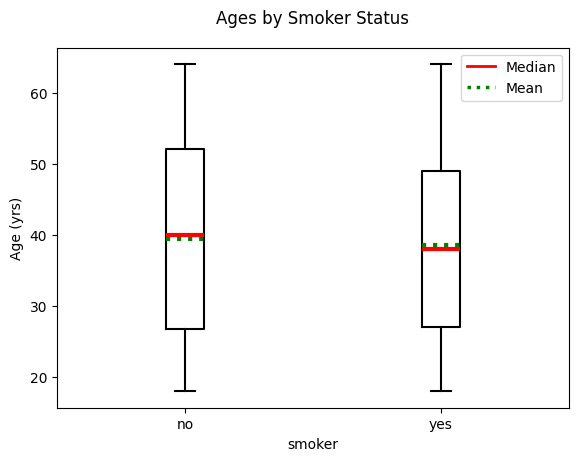

In [175]:
insurance_data.boxplot(column="age", by="smoker", grid=False, showmeans=True, meanline=True, boxprops=boxprops, whiskerprops=boxprops, medianprops=medianprops, meanprops=meanprops, capprops=boxprops)
plt.suptitle("Ages by Smoker Status")
plt.title("")
plt.legend(handles=[median_line, mean_line])
plt.ylabel("Age (yrs)")
plt.show()

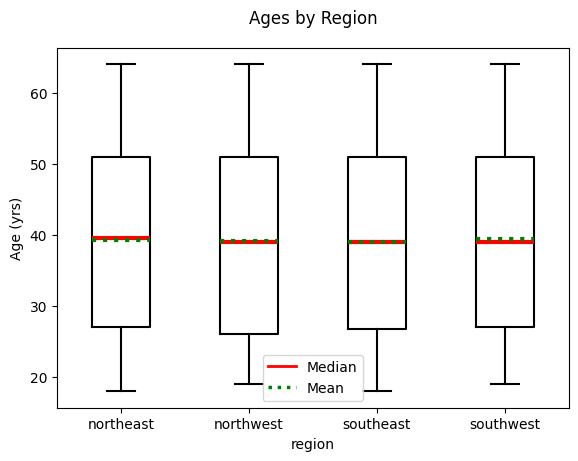

In [176]:
insurance_data.boxplot(column="age", by="region", grid=False, showmeans=True, meanline=True, boxprops=boxprops, whiskerprops=boxprops, medianprops=medianprops, meanprops=meanprops, capprops=boxprops)
plt.suptitle("Ages by Region")
plt.title("")
plt.legend(handles=[median_line, mean_line])
plt.ylabel("Age (yrs)")
plt.show()

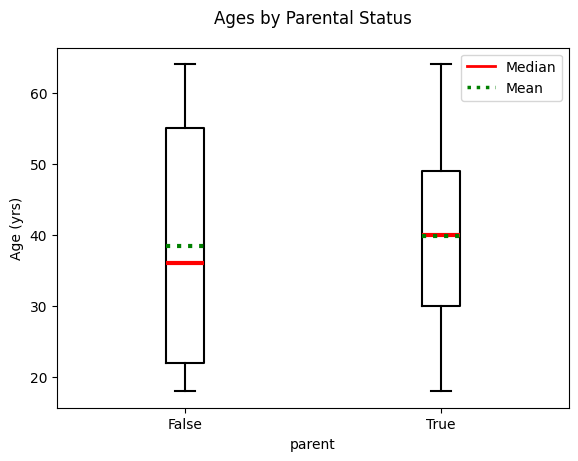

In [54]:
insurance_data.boxplot(column="age", by="parent", grid=False, showmeans=True, meanline=True, boxprops=boxprops, whiskerprops=boxprops, medianprops=medianprops, meanprops=meanprops, capprops=boxprops)
plt.suptitle("Ages by Parental Status")
plt.title("")
plt.legend(handles=[median_line, mean_line])
plt.ylabel("Age (yrs)")
plt.show()

We can also look at the average age per number of children

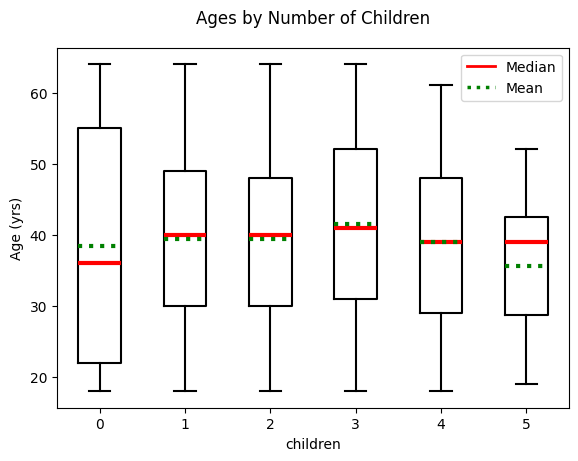

In [29]:
insurance_data.boxplot(column="age", by="children", grid=False, showmeans=True, meanline=True, boxprops=boxprops, whiskerprops=boxprops, medianprops=medianprops, meanprops=meanprops, capprops=boxprops)
plt.suptitle("Ages by Number of Children")
plt.title("")
plt.legend(handles=[median_line, mean_line])
plt.ylabel("Age (yrs)")
plt.show()

In [34]:
insurance_data.groupby("children").size()

children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64

From looking at the different boxplots generated based on the differening variables, the only real difference in the ages is if the person is a parent or not. Parents tend to be older in age but also have less of a spread, even towards the older age, which is a bit surprising. 25% of the people who have no kids are within the 18-23 age range, but beyond that is a lot more spread out. Parents have ages more clustered towards 30-50. I thought for people with no parents, there would be even more of a cluster towards the young side. For parents, I thought the data wouldn't be so clustered towards middle-age but more spread out beyond the mid-20s. 

When breaking the parental groups into the number of children, the people with the most children skewed a bit on the younger side which doesn't make a whole lot of sense to me because I assumed those people would have had children over a longer period of time. But, when you look at the number of people in each group, there's a lot less people with 4 and 5 children compared to the other groups which could account for the unexpected numbers.

The only other groupings that have any difference is that smokers are slightly more younger on average than non-smokers but that difference isn't a lot or as drastic as parental status.

##### Cost vs Age 
Now let's see how the average insurance cost changes based on the age.

In [47]:
# Function to plot data and regression line
def plot_with_regression(ax, x, y, title, color, xlabel, ylabel):
    slope, intercept, r_value, p_value, _ = linregress(x, y)
    ax.plot(x, y, marker='o', linestyle='solid', label=title, color=color)
    ax.plot(x, intercept + slope * x, linestyle='dashed', color=color, label=f'{title} Age Trend Line')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)
    ax.text(0.02, 0.95, f'R-Value: {r_value:.2f}', transform=ax.transAxes, color=color, fontweight="bold", fontsize=11)
    ax.text(0.02, 0.90, f'P-Value: {p_value:.2e}', transform=ax.transAxes, color=color, fontweight="bold", fontsize=11)
    ax.text(0.02, 0.85, f'Trend Slope: {slope:.2f}', transform=ax.transAxes, color=color, fontweight="bold", fontsize=11)

In [36]:
colors = {
    0: 'blue',
    1: 'green',
    2: 'red'
}

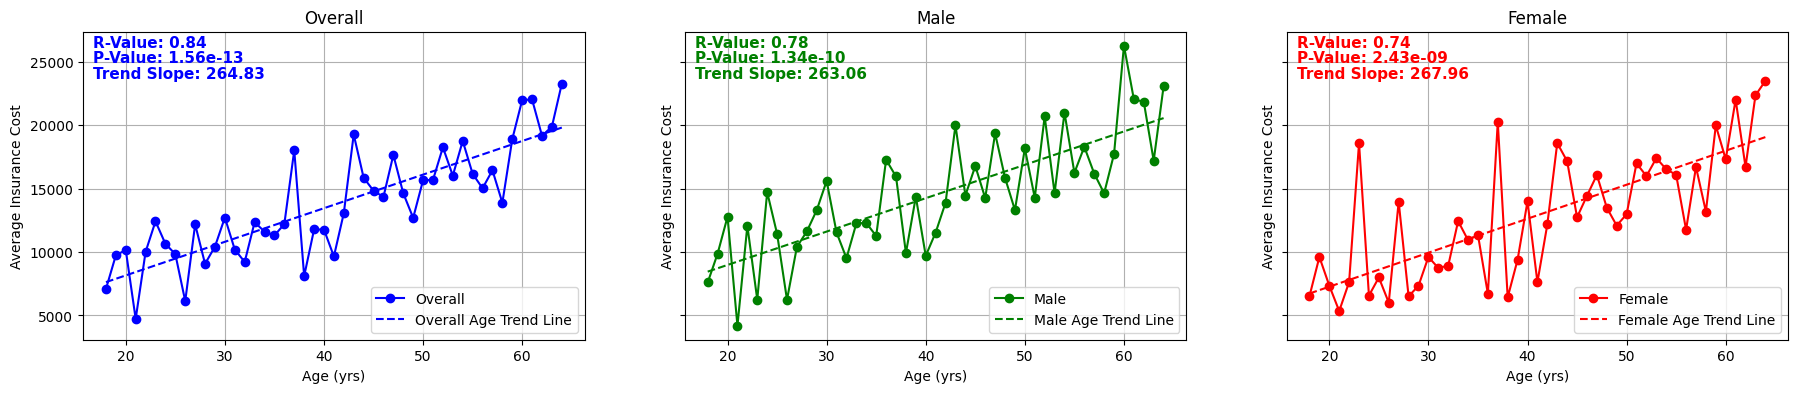

In [48]:
avg_cost_age_sex = {
    0: insurance_data.groupby("age")["charges"].mean().round(2),
    1: insurance_data[insurance_data["sex"]=="male"].groupby("age")["charges"].mean().round(2),
    2: insurance_data[insurance_data["sex"]=="female"].groupby("age")["charges"].mean().round(2)
}

groups = {
    0: "Overall",
    1: "Male",
    2: "Female"
}

fig, axs = plt.subplots(1, 3, figsize=(22, 4), sharey=True)

for ax, (group, data) in zip(axs, avg_cost_age_sex.items()):
    plot_with_regression(ax, data.index, data.values, groups[group], colors[group],'Age (yrs)', 'Average Insurance Cost')

Looking at this graph we can see that there is a very strong positive correlation between a person's insurance cost and their age. We can also see that males, on average, tend to have a higher insurance cost too albeit females has a slightly higher trend slope.

I want to also see how breaking the data apart by smoker status impact this relationship between age and cost.

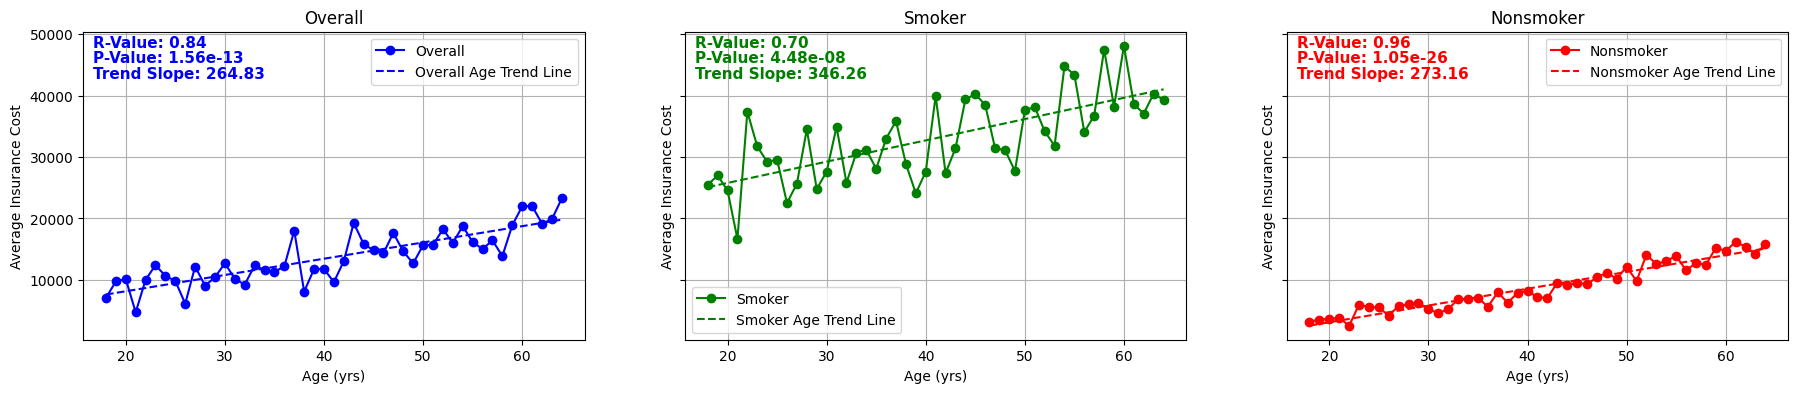

In [49]:
avg_cost_age_smoker = {
    0: insurance_data.groupby("age")["charges"].mean().round(2),
    1: insurance_data[insurance_data["smoker"]=="yes"].groupby("age")["charges"].mean().round(2),
    2: insurance_data[insurance_data["smoker"]=="no"].groupby("age")["charges"].mean().round(2)
}

groups = {
    0: "Overall",
    1: "Smoker",
    2: "Nonsmoker"
}

fig, axs = plt.subplots(1, 3, figsize=(22, 4), sharey=True)
for ax, (group, data) in zip(axs, avg_cost_age_smoker.items()):
    plot_with_regression(ax, data.index, data.values, groups[group], colors[group], "Age (yrs)", "Average Insurance Cost")

There is a huge difference between smokers and nonsmokers. Smokers by default have a huge increase in insurance cost but the cost goes up a lot more over time compared to nonsmokers. This isn't too surprising though, this is what was expected from the data as smoking is very dangerous to a person.

The last thing I want to look at a little bit is the relationship between BMI and Age. 

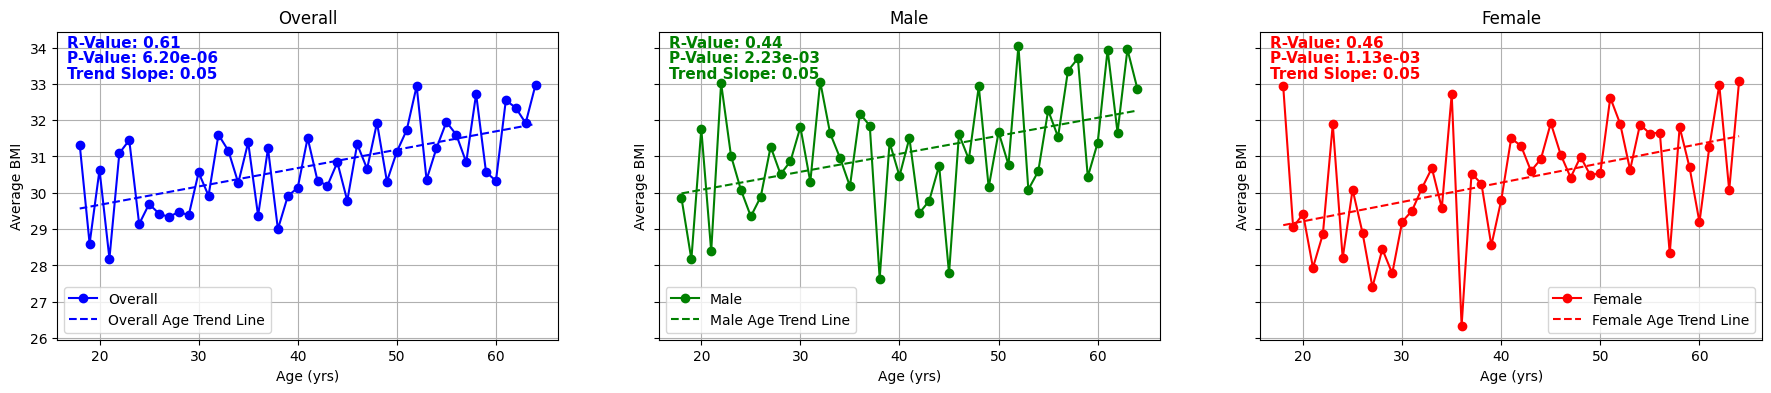

In [61]:
avg_bmi_age_sex = {
    0: insurance_data.groupby("age")["bmi"].mean().round(2),
    1: insurance_data[insurance_data["sex"]=="male"].groupby("age")["bmi"].mean().round(2),
    2: insurance_data[insurance_data["sex"]=="female"].groupby("age")["bmi"].mean().round(2)
}

groups = {
    0: "Overall",
    1: "Male",
    2: "Female"
}

fig, axs = plt.subplots(1, 3, figsize=(22, 4), sharey=True)
for ax, (group, data) in zip(axs, avg_bmi_age_sex.items()):
    plot_with_regression(ax, data.index, data.values, groups[group], colors[group], "Age (yrs)", "Average BMI")

There is a positive correlation between the Age and BMI but it isn't too strong because BMI tends to fluctuate a lot, especially looking at just males vs females. Although one interesting thing is that the trend slope between the groups is the same despite the clear differences. 

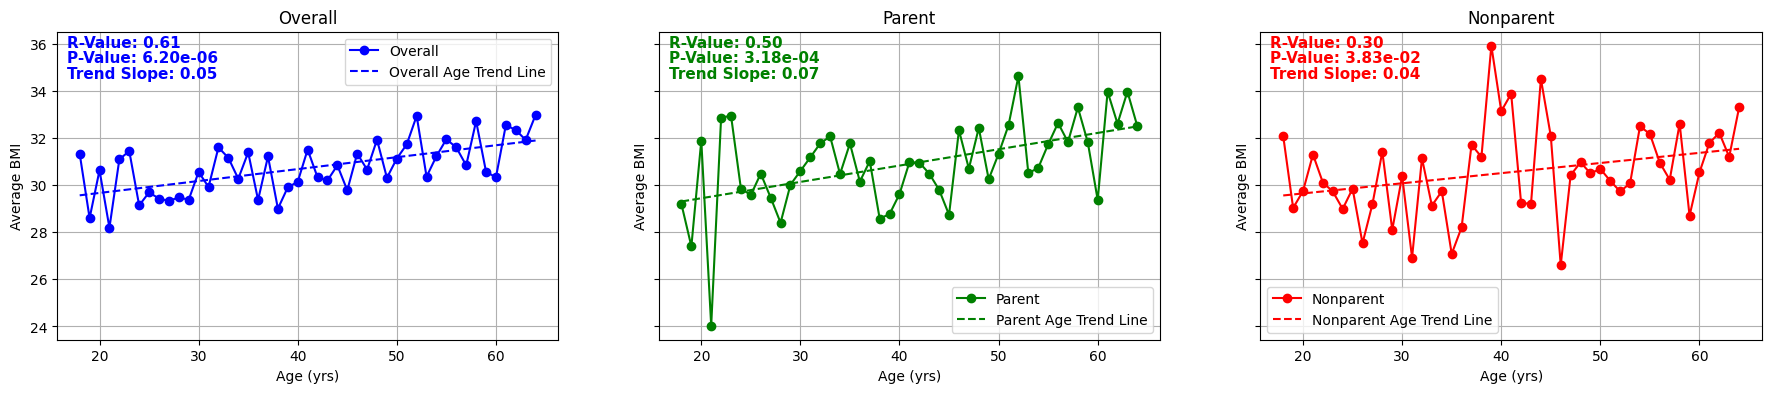

In [106]:
avg_bmi_age_parent = {
    0: insurance_data.groupby("age")["bmi"].mean().round(2),
    1: insurance_data[insurance_data["parent"]==True].groupby("age")["bmi"].mean().round(2),
    2: insurance_data[insurance_data["parent"]==False].groupby("age")["bmi"].mean().round(2)
}

groups = {
    0: "Overall",
    1: "Parent",
    2: "Nonparent"
}

fig, axs = plt.subplots(1, 3, figsize=(22, 4), sharey=True)
for ax, (group, data) in zip(axs, avg_bmi_age_parent.items()):
    plot_with_regression(ax, data.index, data.values, groups[group], colors[group], "Age (yrs)", "Average BMI")

An interesting thing to note here is the spike in BMI for nonparents around 40 yrs that is not present for parents and the drop in bmi in young parents but not in nonparents. These spikes/drops can impact the trend line and the R-Values. I wasn't expected them and am not sure exactly what could be causing them other than just odd data. I honestly expected the younger side (especially for nonparents) to be on the smaller side for BMI as motabolism gets worse as a person ages but it wasn't as big of a difference as I expected. 

#### Further Cost Breakdowns

Also going to just get the numbers of people in each region since the question was posed in the project itself

In [70]:
insurance_data.groupby("region").size().sort_values(ascending=False)

region
southeast    364
northwest    325
southwest    325
northeast    324
dtype: int64

Pretty even distribution of people between each region.

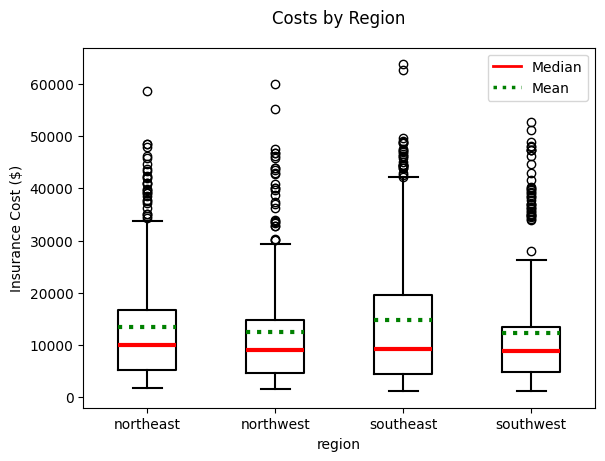

In [71]:
insurance_data.boxplot(column="charges", by="region", grid=False, showmeans=True, meanline=True, boxprops=boxprops, whiskerprops=boxprops, medianprops=medianprops, meanprops=meanprops, capprops=boxprops)
plt.suptitle("Costs by Region")
plt.title("")
plt.legend(handles=[median_line, mean_line])
plt.ylabel("Insurance Cost ($)")
plt.show()

The insurance costs are actually more varied than I thought they would be. Let's see if there are more smokers in some regions than others (mainly southeast)

In [93]:
insurance_data.groupby(["region", "smoker"]).size()

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
dtype: int64

Southeast does have more smokers compared to the other region in this dataset, and northwest and southwest have of the least. This is likely why southeast has a higher average insurance cost and northwest and southwest have lower averages.

We can also see the overall differences between smokers and nonsmokers instead of by age like before

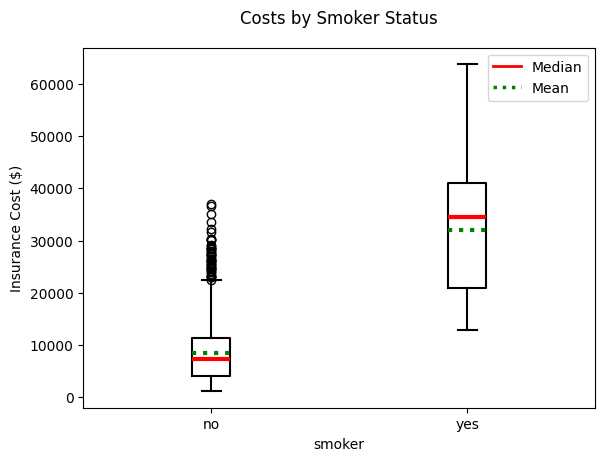

In [94]:
insurance_data.boxplot(column="charges", by="smoker", grid=False, showmeans=True, meanline=True, boxprops=boxprops, whiskerprops=boxprops, medianprops=medianprops, meanprops=meanprops, capprops=boxprops)
plt.suptitle("Costs by Smoker Status")
plt.title("")
plt.legend(handles=[median_line, mean_line])
plt.ylabel("Insurance Cost ($)")
plt.show()

Clearly this is going to be the main variable in insurance costs but we can also check some others

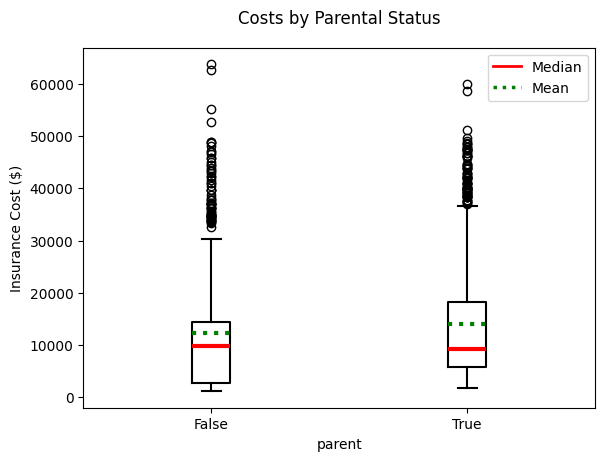

In [97]:
insurance_data.boxplot(column="charges", by="parent", grid=False, showmeans=True, meanline=True, boxprops=boxprops, whiskerprops=boxprops, medianprops=medianprops, meanprops=meanprops, capprops=boxprops)
plt.suptitle("Costs by Parental Status")
plt.title("")
plt.legend(handles=[median_line, mean_line])
plt.ylabel("Insurance Cost ($)")
plt.show()

This one actually surprises me, I thought there would be more of difference between the two but apparently not.

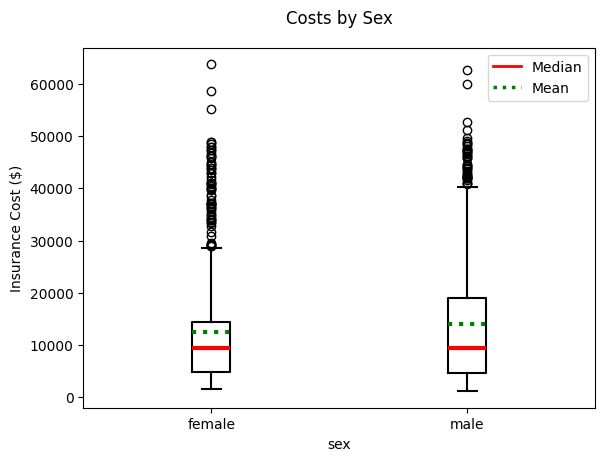

In [98]:
insurance_data.boxplot(column="charges", by="sex", grid=False, showmeans=True, meanline=True, boxprops=boxprops, whiskerprops=boxprops, medianprops=medianprops, meanprops=meanprops, capprops=boxprops)
plt.suptitle("Costs by Sex")
plt.title("")
plt.legend(handles=[median_line, mean_line])
plt.ylabel("Insurance Cost ($)")
plt.show()

This one makes sense, men have a slightly higher cost on average but it isn't much higher

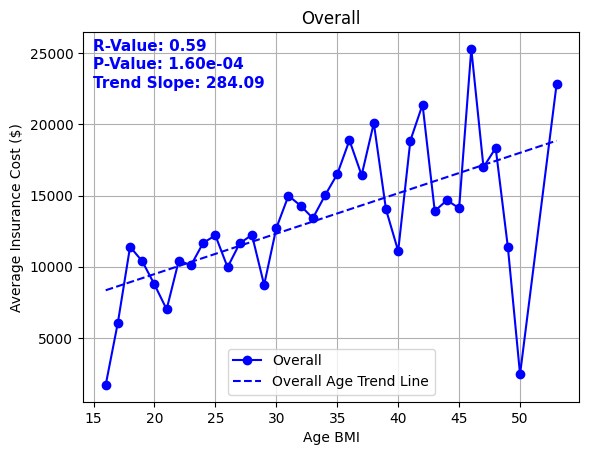

In [108]:
# Lambda function is to round the BMI column to the nearest integer, otherwise too many jumpy lines on the plot
# Put into a dictionary for easy reuse of plot_with_regression function
avg_bmi_cost = {
    0: insurance_data.groupby(insurance_data["bmi"].apply(lambda x: round(x, 0)))["charges"].mean().round(2)
}
# Get the default ax for one plot to reuse the plot_with_regression function
ax = plt.gca()

for group, data in avg_bmi_cost.items():
    plot_with_regression(ax, data.index, data.values, groups[group], colors[group], "Age BMI", "Average Insurance Cost ($)")


The BMI also correlates a bit with the insurance cost. First, let's check the average BMI between smokers and nonsmokers. If there is enough difference we will separate them out and compare the bmi vs insurance cost again

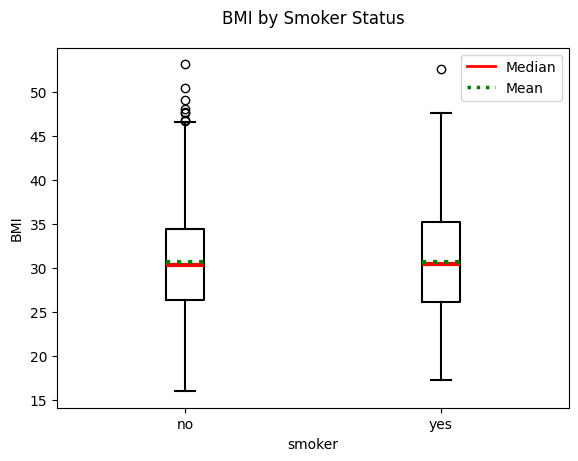

In [109]:
insurance_data.boxplot(column="bmi", by="smoker", grid=False, showmeans=True, meanline=True, boxprops=boxprops, whiskerprops=boxprops, medianprops=medianprops, meanprops=meanprops, capprops=boxprops)
plt.suptitle("BMI by Smoker Status")
plt.title("")
plt.legend(handles=[median_line, mean_line])
plt.ylabel("BMI")
plt.show()

There's not really enough of a difference to make the BMI vs insurance cost plots for the different groups here. 

We shall say the biggest impact on Insurance Cost is if the person is a smoker or not. Then probably age and then BMI (age is more correlated even if the trend slope for BMI is higher)

#### Future Analysis

One main thing for future analysis is actually using machine learning techniques to fully learn which variables have the most impact. We can then also get an estimate for each person's insurance cost as well if we can get a good algorithm working.

I could also make a class/more functions for the analysis instead of having all of the code be in individual cells. One function in particular would be the boxplot code which was repeated a lot.